## Machine Learning Midterm - Anna Sullivan

This notebook is categorized into 7 sections detailing the process of connecting to MongoDB, finding and merging datasets, creating OLS regression and sentiment analysis, and finally creating a data analysis report.

### 1. Connect to MongoDB

In [3]:
import json

#load secret key
with open(r'C:\Users\aes08\OneDrive\Desktop\college\junior\spring 25\DATA320\secrets.json') as f:
    data = json.load(f)

    secret_key = data['my-secret-key']

print(f"My secret key is {len(secret_key)} characters in length.")

My secret key is 72 characters in length.


In [4]:
import pymongo
import certifi

#connect to database using known good certificates
client = pymongo.MongoClient(secret_key, tlsCAFile=certifi.where())
print(f"Using MongoDB version {client.server_info()['version']}.")

Using MongoDB version 8.0.9.


In [5]:
#check what databases exist on the server
all_databases = client.list_database_names()
print(f"This MongoDB server has the databases {all_databases}.")

This MongoDB server has the databases ['data320', 'sample_mflix', 'admin', 'local'].


In [6]:
#choose correct collection
my_database = client['data320']

#list of collections within my database
all_collections = my_database.list_collection_names()
print(f"This database has the collections {all_collections}.")

This database has the collections ['imdb_fixed', 'metacritic', 'imdb_pipeline'].


### 2. Find IMDB movies released in 2015

In [7]:
import pandas as pd

#retrieve all records from a collection
cursor = my_database["imdb_pipeline"].find({"release_year": 2015})

#convert information into a pandas dataframe
imdb_pipeline = pd.DataFrame(cursor)

#make sure the information is read correctly
imdb_pipeline.head()

,_id,title,genres,director,gross_sales,is_gross_sales_usd,gross_sales_value,budget,is_budget_usd,budget_value,...,is_opening_weekend_usd,opening_weekend_value,certlist,release_date,runtime,user_rating,votes,mpaa,release_year,release_month
0,637fd8aaa23f8f7c1aca9f04,Fifty Shades of Grey,"Drama, Romance, Thriller",Sam Taylor-Johnson,571006128,True,"{'match': '571,006,128', 'idx': 1, 'captures':...",40000000,True,"{'match': '40,000,000', 'idx': 1, 'captures': ...",...,True,"{'match': '94,395,000,', 'idx': 1, 'captures':...","[TV-14::(DLS), TV-MA::(S), TV-14, R, Unrated]",2015-02-09,125.0,4.1,320919,R,2015,2
1,637fd8aca23f8f7c1aca9f05,The Witch,"Drama, Fantasy, Horror, Mystery, Thriller",Robert Eggers,None,False,None,3500000,True,"{'match': '3,500,000', 'idx': 1, 'captures': [...",...,True,"{'match': '8,800,230,', 'idx': 1, 'captures': ...",[R],2015-01-23,92.0,6.9,263185,R,2015,1
2,637fd8afa23f8f7c1aca9f06,Love,"Drama, Romance",Gaspar Noé,861057,True,"{'match': '861,057', 'idx': 1, 'captures': ['8...",3000000,True,"{'match': '3,000,000', 'idx': 1, 'captures': [...",...,False,None,[TV-MA::(Netflix rating)],2015-05-20,135.0,6.1,59596,NaN,2015,5
3,637fd8b2a23f8f7c1aca9f07,Mad Max: Fury Road,"Action, Adventure, Sci-Fi, Thriller",George Miller,378436354,True,"{'match': '378,436,354', 'idx': 1, 'captures':...",150000000,True,"{'match': '150,000,000', 'idx': 1, 'captures':...",...,False,None,"[TV-14::(DLV, TV Rating.), R]",2015-05-07,120.0,8.1,998289,R,2015,5
4,637fd8b5a23f8f7c1aca9f08,The Big Short,"Biography, Comedy, Drama, History",Adam McKay,133346506,True,"{'match': '133,346,506', 'idx': 1, 'captures':...",28000000,True,"{'match': '28,000,000', 'idx': 1, 'captures': ...",...,True,"{'match': '10,531,026,', 'idx': 1, 'captures':...",[R],2015-11-12,130.0,7.8,431122,R,2015,11


### 3. Find Metacritic movies released in 2015

In [8]:
import pandas as pd

#retrieve all records from a collection
cursor = my_database["metacritic"].find({"release_date": {"$regex": "2015$"}})

#convert information into a pandas dataframe
metacritic = pd.DataFrame(cursor)

#convert values to numbers
metacritic.score = pd.to_numeric(metacritic.score, errors = "coerce")
metacritic.release_date = pd.to_datetime(metacritic.release_date, errors = "coerce")

#make sure the information is read correctly
metacritic.head()

,_id,movie_id,title,release_date,description,score,thumbnail
0,681c005b51a9623c57b16939,18481,The Look of Silence,2015-07-17,The Look of Silence is Joshua Oppenheimer's po...,92,https://static.metacritic.com/images/products/...
1,681c005b51a9623c57b1694a,18498,Room,2015-10-16,Jack (Jacob Tremblay) is a spirited 5 year-old...,86,https://static.metacritic.com/images/products/...
2,681c005b51a9623c57b16951,18505,The Fool,2015-09-16,"Dima Nikitin is a simple and honest guy, a for...",83,https://static.metacritic.com/images/products/...
3,681c005b51a9623c57b16962,18522,Sicario,2015-09-18,"In Mexico, Sicario means hitman. In the lawles...",82,https://static.metacritic.com/images/products/...
4,681c005b51a9623c57b16967,18527,Shaun the Sheep Movie,2015-08-05,When Shaun decides to take the day off and hav...,81,https://static.metacritic.com/images/products/...


### 4. Merge the datasets together

In [ ]:
import pandas as pd 

unified_view = pd.merge(imdb_pipeline, metacritic, how="inner", on="title")

#converted number values to numeric so the regression model would be accurate
unified_view['gross_sales'] = pd.to_numeric(unified_view['gross_sales'], errors = 'coerce')
unified_view['budget'] = pd.to_numeric(unified_view['budget'], errors = 'coerce')
unified_view['opening_weekend'] = pd.to_numeric(unified_view['opening_weekend'], errors = 'coerce')
unified_view['votes'] = pd.to_numeric(unified_view['votes'], errors = 'coerce')
unified_view['runtime'] = pd.to_numeric(unified_view['runtime'], errors = 'coerce')

unified_view.head()

,_id_x,title,genres,director,gross_sales,is_gross_sales_usd,gross_sales_value,budget,is_budget_usd,budget_value,...,votes,mpaa,release_year,release_month,_id_y,movie_id,release_date_y,description,score,thumbnail
0,637fd8aaa23f8f7c1aca9f04,Fifty Shades of Grey,"Drama, Romance, Thriller",Sam Taylor-Johnson,571006128.0,True,"{'match': '571,006,128', 'idx': 1, 'captures':...",40000000.0,True,"{'match': '40,000,000', 'idx': 1, 'captures': ...",...,320919,R,2015,2,681c005b51a9623c57b16b15,18957,2015-02-13,Recent college graduate Anastasia Steele begin...,46,https://static.metacritic.com/images/products/...
1,637fd8afa23f8f7c1aca9f06,Love,"Drama, Romance",Gaspar Noé,861057.0,True,"{'match': '861,057', 'idx': 1, 'captures': ['8...",3000000.0,True,"{'match': '3,000,000', 'idx': 1, 'captures': [...",...,59596,NaN,2015,5,681c005b51a9623c57b16ae2,18906,2015-10-30,Murphy is an American living in Paris who ente...,51,https://static.metacritic.com/images/products/...
2,637fd8b2a23f8f7c1aca9f07,Mad Max: Fury Road,"Action, Adventure, Sci-Fi, Thriller",George Miller,378436354.0,True,"{'match': '378,436,354', 'idx': 1, 'captures':...",150000000.0,True,"{'match': '150,000,000', 'idx': 1, 'captures':...",...,998289,R,2015,5,681c005b51a9623c57b1693e,18486,2015-05-15,"In the furthest reaches of our planet, in a st...",90,https://static.metacritic.com/images/products/...
3,637fd8b5a23f8f7c1aca9f08,The Big Short,"Biography, Comedy, Drama, History",Adam McKay,133346506.0,True,"{'match': '133,346,506', 'idx': 1, 'captures':...",28000000.0,True,"{'match': '28,000,000', 'idx': 1, 'captures': ...",...,431122,R,2015,11,681c005b51a9623c57b1696b,18531,2015-12-11,"When four outsiders saw what the big banks, me...",81,https://static.metacritic.com/images/products/...
4,637fd8b8a23f8f7c1aca9f09,The Hateful Eight,"Crime, Drama, Mystery, Thriller, Western",Quentin Tarantino,155760117.0,True,"{'match': '155,760,117', 'idx': 1, 'captures':...",44000000.0,True,"{'match': '44,000,000', 'idx': 1, 'captures': ...",...,598502,R,2015,12,681c005b51a9623c57b16a0a,18690,2015-12-25,Six or eight or twelve years after the Civil W...,68,https://static.metacritic.com/images/products/...


### 5. Build a basic regression model

In [10]:
import statsmodels.formula.api

ols_model = statsmodels.formula.api.ols(
    formula = "gross_sales ~ user_rating + budget + opening_weekend + votes + runtime",
    data=unified_view).fit()
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:            gross_sales   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     201.3
Date:                Sun, 01 Jun 2025   Prob (F-statistic):           1.50e-36
Time:                        20:24:05   Log-Likelihood:                -1327.2
No. Observations:                  67   AIC:                             2666.
Df Residuals:                      61   BIC:                             2680.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.074e+07   1.29e+08     

### 6. Sentiment analysis

1a. Importing transformers and testing that the cardiffnlp model works. I had to use the regular base sentiment instead of XLM, because processing was not working for the XLM verison on my computer.

In [1]:
import transformers

MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_task = transformers.pipeline("sentiment-analysis", model=MODEL,
    tokenizer = transformers.AutoTokenizer.from_pretrained(MODEL))

print(sentiment_task("Covid cases are increasing fast!"))

print(sentiment_task("I really like ice cream in the summer!"))

print(sentiment_task("The book Moby Dick was written by Herman Melville."))

c:\Users\aes08\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device 

[{'label': 'negative', 'score': 0.723577082157135}]
[{'label': 'positive', 'score': 0.9852145314216614}]
[{'label': 'neutral', 'score': 0.89524245262146}]


2a. Creating the pipeline using the previous model, then testing that the outputs are correct.

In [ ]:
from transformers import pipeline

MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_pipeline = transformers.pipeline("sentiment-analysis", model=MODEL,
    tokenizer = transformers.AutoTokenizer.from_pretrained(MODEL))

def calculate_sentiment(text):
    if text is None:
        return 0
    result = sentiment_pipeline(text)
    label = result[0]['label'].lower()
    score = result[0]['score']

    if label == 'negative':
        return 0 - score - 0.5
    elif label == 'neutral':  
        return score - 0.5
    elif label == 'positive':
        return 1 + score - 0.5
    return 0 

# Test cases
print(calculate_sentiment("I came down with the flu today and I'm feeling really sick."))
print(calculate_sentiment("Today is my birthday!"))
print(calculate_sentiment("The book Moby Dick was written by Herman Melville."))
print(calculate_sentiment(None))


Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


-1.400494635105133
1.4731470346450806
0.39524245262145996
0


3a. Creating sentiment analysis for all movies in 2015 and adding results as a column in the merged dataset.

In [13]:
MODEL = "cardiffnlp/twitter-roberta-base-sentiment-latest"
sentiment_column = transformers.pipeline("sentiment-analysis", model=MODEL,
    tokenizer = transformers.AutoTokenizer.from_pretrained(MODEL))

sentiment_column = unified_view.apply(lambda row : calculate_sentiment(row.get('description')), axis = 1)

unified_view["sentiment"] = sentiment_column
unified_view.head()

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu


,_id_x,title,genres,director,gross_sales,is_gross_sales_usd,gross_sales_value,budget,is_budget_usd,budget_value,...,mpaa,release_year,release_month,_id_y,movie_id,release_date_y,description,score,thumbnail,sentiment
0,637fd8aaa23f8f7c1aca9f04,Fifty Shades of Grey,"Drama, Romance, Thriller",Sam Taylor-Johnson,571006128.0,True,"{'match': '571,006,128', 'idx': 1, 'captures':...",40000000.0,True,"{'match': '40,000,000', 'idx': 1, 'captures': ...",...,R,2015,2,681c005b51a9623c57b16b15,18957,2015-02-13,Recent college graduate Anastasia Steele begin...,46,https://static.metacritic.com/images/products/...,0.382255
1,637fd8afa23f8f7c1aca9f06,Love,"Drama, Romance",Gaspar Noé,861057.0,True,"{'match': '861,057', 'idx': 1, 'captures': ['8...",3000000.0,True,"{'match': '3,000,000', 'idx': 1, 'captures': [...",...,NaN,2015,5,681c005b51a9623c57b16ae2,18906,2015-10-30,Murphy is an American living in Paris who ente...,51,https://static.metacritic.com/images/products/...,0.143113
2,637fd8b2a23f8f7c1aca9f07,Mad Max: Fury Road,"Action, Adventure, Sci-Fi, Thriller",George Miller,378436354.0,True,"{'match': '378,436,354', 'idx': 1, 'captures':...",150000000.0,True,"{'match': '150,000,000', 'idx': 1, 'captures':...",...,R,2015,5,681c005b51a9623c57b1693e,18486,2015-05-15,"In the furthest reaches of our planet, in a st...",90,https://static.metacritic.com/images/products/...,0.189830
3,637fd8b5a23f8f7c1aca9f08,The Big Short,"Biography, Comedy, Drama, History",Adam McKay,133346506.0,True,"{'match': '133,346,506', 'idx': 1, 'captures':...",28000000.0,True,"{'match': '28,000,000', 'idx': 1, 'captures': ...",...,R,2015,11,681c005b51a9623c57b1696b,18531,2015-12-11,"When four outsiders saw what the big banks, me...",81,https://static.metacritic.com/images/products/...,0.153990
4,637fd8b8a23f8f7c1aca9f09,The Hateful Eight,"Crime, Drama, Mystery, Thriller, Western",Quentin Tarantino,155760117.0,True,"{'match': '155,760,117', 'idx': 1, 'captures':...",44000000.0,True,"{'match': '44,000,000', 'idx': 1, 'captures': ...",...,R,2015,12,681c005b51a9623c57b16a0a,18690,2015-12-25,Six or eight or twelve years after the Civil W...,68,https://static.metacritic.com/images/products/...,0.413792


### 6. Data analysis report

### Central question: How different are audience and critic opinions?



Firstly, I wanted to see how critic (Metacritic) and audience (IMDB) ratings compare to one another. Would there be a big discrepancy in how these two groups rate movies in general?
You'll see for this analysis I chose to normalize critic scores (dividing by 100) to make comparisons more even. 

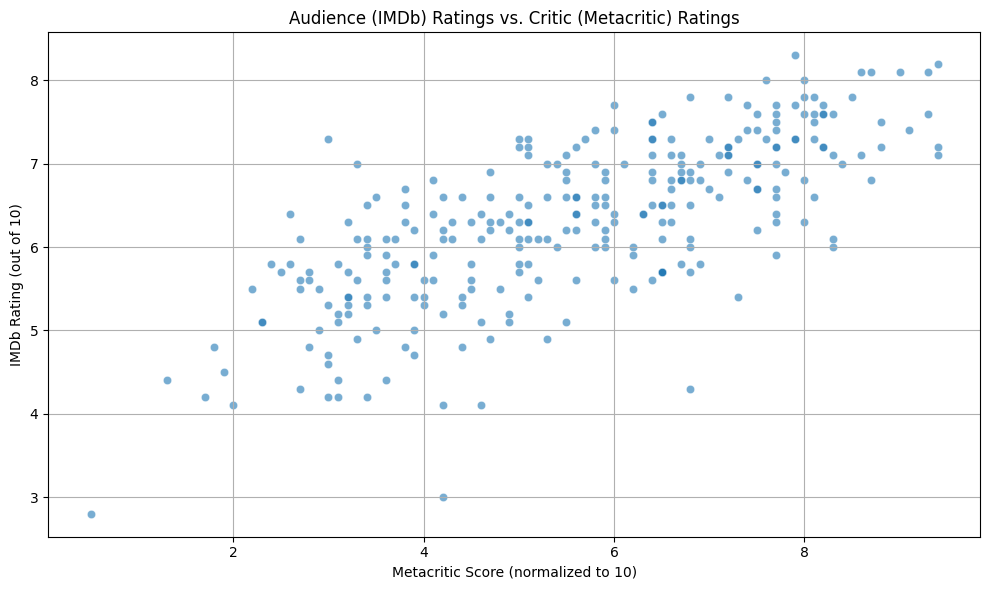

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


unified_view['metacritic_normalized'] = unified_view['score'] / 10

plt.figure(figsize=(10, 6))
sns.scatterplot(data=unified_view, x='metacritic_normalized', y='user_rating', alpha=0.6)

plt.title('Audience (IMDb) Ratings vs. Critic (Metacritic) Ratings')
plt.xlabel('Metacritic Score (normalized to 10)')
plt.ylabel('IMDb Rating (out of 10)')
plt.grid(True)
plt.tight_layout()
plt.show()

After normalizing critic scores to align on the same scale as audience scores, we see a positive upwards correlation between the two. The relationship is strong enough to indicate that critic and audience ratings generally follow a similar trend.

 Upon closer examination, it seems that audiences tend to be more generous in ranking than critics do, although it is interesting to note that movies ranked highly by critics are often ranked lower by audiences. 

 Next, I wanted to drill down further to see differences visualized more clearly.


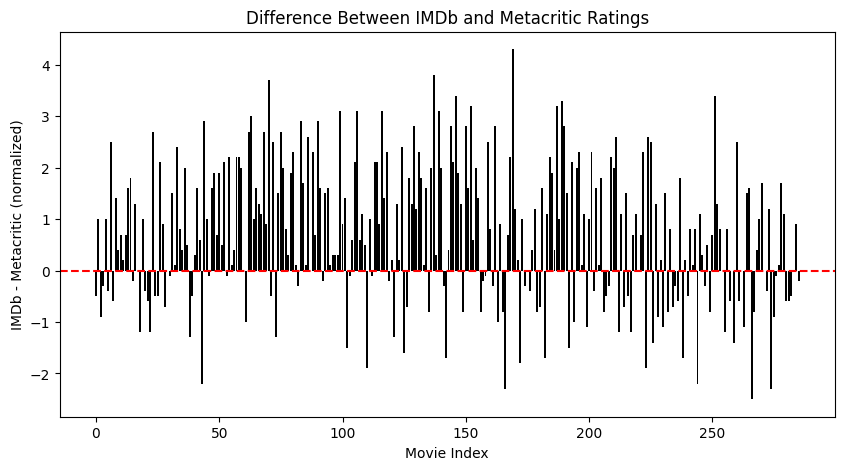

In [ ]:
from matplotlib import pyplot as plt

unified_view['rating_diff'] = unified_view['user_rating'] - unified_view['metacritic_normalized']


plt.figure(figsize=(10, 5))
plt.bar(unified_view.index, unified_view['rating_diff'], color='black')
plt.axhline(0, color='red', linestyle='--')

plt.title("Difference Between IMDb and Metacritic Ratings")
plt.xlabel("Movie Index")
plt.ylabel("IMDb - Metacritic (normalized)")
plt.show()

In this chart, we can better see that audiences tend to rate higher than critics. The X axis (Movie Index) accounts for all the movies in the unified view database as they are labeled 0-250 (approximately). The positive lines indicate a higher audience rating, while the negative lines indicate a higher critic rating. 

Lastly, I wanted to analyze if sentiment analysis has a noticeable impact on user rating- do better sentiments correlate with a higher rating for critics or audiences?
To do this, I used a groupby clause to create average sentiment scores for each rating. 

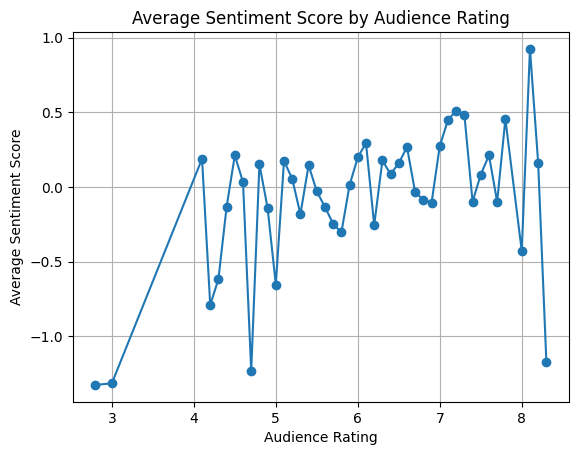

In [ ]:
import pandas as pd


rating_sentiment = unified_view.groupby(unified_view['user_rating'].round(1))['sentiment'].mean()

rating_sentiment.plot(kind='line', marker='o')
plt.title("Average Sentiment Score by Audience Rating")
plt.xlabel("Audience Rating")
plt.ylabel("Average Sentiment Score")
plt.grid(True)
plt.show()

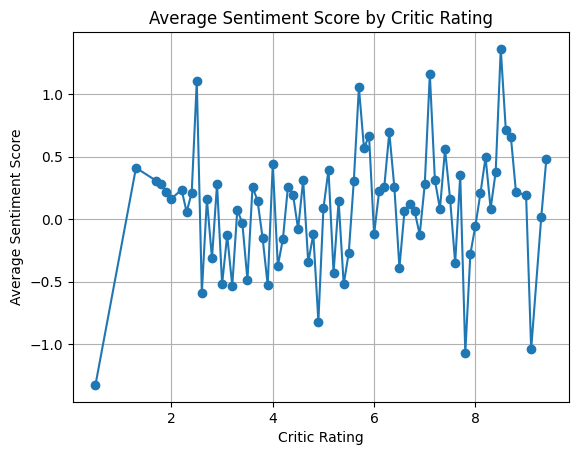

In [23]:
import pandas as pd

# Group by rounded rating
unified_view['metacritic_normalized'] = unified_view['score'] / 10
rating_sentiment = unified_view.groupby(unified_view['metacritic_normalized'].round(1))['sentiment'].mean()

rating_sentiment.plot(kind='line', marker='o')
plt.title("Average Sentiment Score by Critic Rating")
plt.xlabel("Critic Rating")
plt.ylabel("Average Sentiment Score")
plt.grid(True)
plt.show()

Seemingly, sentiment analysis doesn't seem to have much impact on either group. Audience ratings in the 6-8 score range do float around a slightly positive score compared to critic ratings. This could be explained by a preference in kid-friendly or young adult genres that tend to have more positive plot descriptions.

For critic ratings, sentiment doesn't appear to matter at all. Thinking about this in a broader context, it makes sense; a positive plot doesn't make a story better than a negative or sad one. Great movies can be made in either category- what drives positive ratings comes down to more subjective aspects like directing style, cast, set design, dialogue, and more.

### Summary and Findings

Through data analysis, we've discovered that audience ratings are typically more generous than critic ratings. While both tend to be in a ballpark of agreement, (there aren't any movies in the dataset that have a really high audience rating and super low critic rating), audiences seem to be less critical than actual movie critics.

AI sentiment doesn't have a noticeable impact on movie rating. As previously mentioned, this makes sense in a broader context.

To some, it may seem obvious that professional critics are more conservative on a grading scale than audiences. However, the question was worth exploring considering critics have a different background than audiences do. It could have been possible that audiences are harsher considering they don't have as much of a movie-analysis background as critics do.

It would be interesting to conduct further research on this to discover if audiences prefer certain genres, directors, or actors compared to critics. There are certainly more variables available for potential analysis that may paint a more detailed picture of this relationship.

### Credits


I would like to thank Ted Spence for his PowerPoint slides and GitHub reference tools in aiding this project. I would also like to shout out Vedant Mahawar's discussion board contribution for helping me decide what to focus on in my analysis by showing his question and graphs used!
